# Examples

This notebook demonstrates the main functionality and scenerios that the **esrot1d** package supports.

The package name "**esrot1d**" means: effect-size rules-of-thumb for one-dimensinal functional data.

<br>
<br>

The main goals of **esort1d** are: 

- To demonstrate probability concepts relevant to effect size interpretations for simple scalar (0D) and one-dimensional functional (1D) data
- To support calculations for other documents in this repository this project the attached manuscript

The main goal of **esrot1d** is NOT to be a comprehensive effect-size calculator. 

<br>
<br>

In all probability calculations below only two experimental design scenarios are supported:

- one-sample, assumed normality
- two-sample, assumed normality, equal group sizes and equal group variances

Support is limited to these two cases because these scenarios are minimally sufficient to demonstrate the probability issues discussed in the main manuscript.

<br>
<br>

In [1]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import rft1d
import esrot1d as e1d

<br>
<br>

## Cohen's d-value calculation

One- and two-sample d-values can be calculated using the `d_1sample` and `d_2sample` functions.

An [example one-sample dataset](https://real-statistics.com/students-t-distribution/one-sample-t-test/one-sample-effect-size/)  from real-statistics.com is replicated below. The expected effect size is -0.57932.

In [2]:

y = np.array( [63, 95, 81, 75, 90, 64, 45, 59, 72, 35,
     58, 84, 90, 38, 100, 80, 68, 49, 68, 60,
     76, 83, 87, 54, 45, 58, 64, 63, 92, 87,
     59, 68, 45, 52, 76, 78, 50, 75, 64, 86] )

d = e1d.stats.d_1sample( y - 78 )
print( d )


-0.5793178515101701


For the two-sample case the group sizes needn't be equal. Below a [second example dataset](https://real-statistics.com/students-t-distribution/two-independent-samples-t-test/two-sample-effect-size/) from real-statistics.com is used, with an expected effect size of 0.96212.

In [3]:

y0 = np.array( [13, 17, 19, 10, 20, 15, 18, 9, 12, 15, 16] )
y1 = np.array( [12, 8, 6, 16, 12, 14, 10, 18, 4, 11] )

d = e1d.stats.d_2sample( y0, y1 )
print( d )


0.9621198233018209


<br>
<br>

## Conversion between d- and t-values

The `d2t` and `t2d` functions can be used to convert between d- and t-values. In both cases, sample size `n` is the second required argument, and the `design` keyword argument is either `"1sample"` (default) or `"2sample"`.

In [4]:
d  = e1d.stats.d_1sample( y - 78 )
n  = y.size  # sample size

t  = e1d.stats.d2t( d, n, design='1sample'  )
d1 = e1d.stats.t2d( t, n, design='1sample'  )

print( f"Cohen's d-value:           {d:0.5f}" )
print( f"Converted to t-value:      {t:0.5f}" )
print( f"Converted back to d-value: {d1:0.5f}" )


Cohen's d-value:           -0.57932
Converted to t-value:      -3.66393
Converted back to d-value: -0.57932


<br>

The one-sample t-value can be verified using `scipy.stats.ttest_1samp`:

<br>

In [5]:
results = scipy.stats.ttest_1samp(y, 78)
print( results )

TtestResult(statistic=np.float64(-3.6639277999347053), pvalue=np.float64(0.0007371026207789331), df=np.int64(39))


<br>

For the two-sample sceneraio `n` is the total number of observations. For simplicity only equal group sample sizes and equal group variances are supported.

<br>

In [6]:
d = e1d.stats.d_2sample( y0, y1 )
n = 2 * y0.size

t  = e1d.stats.d2t( d, n, design='2sample' )
d1 = e1d.stats.t2d( t, n, design='2sample' )

print( f"Cohen's d-value:           {d:0.5f}" )
print( f"Converted to t-value:      {t:0.5f}" )
print( f"Converted back to d-value: {d1:0.5f}" )

Cohen's d-value:           0.96212
Converted to t-value:      2.25637
Converted back to d-value: 0.96212


<br>
<br>

## Conversion between t- and p-values

The `t2p` and `p2t` functions implement survival and inverse survival functions, respectively. For simple scalar data they are equivalent to **scipy.stats.t.sf** and **scipy.stats.t.isf**, respectively.


In [7]:
n  = 40     # sample size
v  = n - 1  # degrees of freedom for one-sample case
t  = 1.7    # t-value


p0 = e1d.stats.t2p( t, v )       # survival function in esrot1d
p1 = scipy.stats.t.sf( t, v )    # equivalent calculation in scipy


t0 = e1d.stats.p2t( p0, v )      # inverse survival function in esrot1d
t1 = scipy.stats.t.isf( p1, v )  # equivalent calculation in scipy


print( f'e1d.stats.t2p result:       p = {p0:.5f}' )
print( f'scipy.stats.t.sf result:    p = {p1:.5f}' )
print()
print( f'e1d.stats.p2t result:       t = {t0:.5f}' )
print( f'scipy.stats.t.isf result:   t = {t1:.5f}' )


e1d.stats.t2p result:       p = 0.04855
scipy.stats.t.sf result:    p = 0.04855

e1d.stats.p2t result:       t = 1.70000
scipy.stats.t.isf result:   t = 1.70000


<br>
<br>

## Conversion between d- and p-values

The `d2p` and `p2d` functions can be used to convert between d- and p-values. These are just convenience functions that chain the conversion functions above:

- `d2p` calls `d2t` then `t2p`
- `p2d` calls `p2t` then `t2d`


In [8]:
n  = 10
d  = 0.5

p0 = e1d.stats.d2p( d, n, design='1sample' )

# d2p is equivalent to calculating d2t then t2p:
t1 = e1d.stats.d2t( d, n, design='1sample' )
p1 = e1d.stats.t2p( t1, n-1 )


print( f'e1d.stats.d2p result:   p = {p0:.5f}' )
print( f'd2t then t2p:           p = {p1:.5f}' )


e1d.stats.d2p result:   p = 0.07415
d2t then t2p:           p = 0.07415


In [9]:
n  = 10
p  = 0.05

d0 = e1d.stats.p2d( p, n, design='1sample' )

# p2d is equivalent to calculating p2t then t2d:
t1 = e1d.stats.p2t( p, n-1 )
d1 = e1d.stats.t2d( t1, n, design='1sample' )


print( f'e1d.stats.p2d result:   d = {d0:.5f}' )
print( f'p2t then t2d:           d = {d1:.5f}' )

e1d.stats.p2d result:   d = 0.57968
p2t then t2d:           d = 0.57968


<br>
<br>

## Calculations for one-dimensional (1D) functional data

All functions above can be applied to the 1D functional case. Below several examples are provided. For probability calculations the following arguments are required:

- `dim=1` : specifies the 1D functional case
- `Q` : number of discrete domain points used to approximate the function (usually 100 or 101)
- `fwhm` : functional smoothness (full-width at half-maximum)

<br>
<br>

First let's use the `e1d.stats.d_1sample` function to calculate functional Cohen's d for a random 1D one-sample dataset.


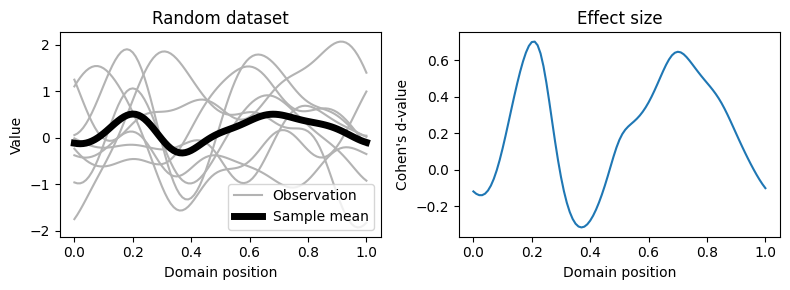

In [10]:

# generate a random dataset:
np.random.seed(1)
Q = 101
w = 20
x = np.linspace(0, 1, Q)      # domain position vector
y = rft1d.randn1d( 8, Q, w )  # args: n.observations, n.domain nodes, fwhm
d = e1d.stats.d_1sample(y)    # Cohen's d (no extra arguments required for functional case)


# plot:
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(8,3), tight_layout=True)
h0 = ax0.plot( x, y.T, color='0.7' )[0]
h1 = ax0.plot( x, y.mean(axis=0), 'k', lw=5 )[0]
ax0.legend([h0,h1], ['Observation', 'Sample mean'] )
plt.setp(ax0, xlabel='Domain position', ylabel='Value', title='Random dataset')
ax1.plot( x, d )
plt.setp(ax1, xlabel='Domain position', ylabel="Cohen's d-value", title='Effect size')
plt.show()


<br>

Next let's calculate the probability associated with the domain-wide maximum d-value:

<br>

In [11]:

dmax = d.max()
n    = y.shape[0]
p    = e1d.stats.d2p(dmax, n, dim=1, design='1sample', Q=Q, fwhm=w)

print( f'Maximum domain-wide d-value:  {dmax:.5f}' )
print( f'p-value:                      {p:.5f}' )


Maximum domain-wide d-value:  0.70262
p-value:                      0.32284


<br>

If the smoothness (FWHM) value is not known, as is usually the case for experimental data, it may be estimated from the residuals using the 
`estimate_fwhm function`:

<br>

In [12]:

res = y - y.mean(axis=0)

we  = e1d.smoothness.estimate_fwhm( res )

print( f'Known population smoothness: fwhm = {w}' )
print( f'Estimated smoothness:        fwhm = {we:.3f}' )


Known population smoothness: fwhm = 20
Estimated smoothness:        fwhm = 19.445


<br>
<br>

**NOTE!**  Just as sample mean and sample standard deviation (SD) are estimates of the population mean and SD, so too is the sample FWHM an estimate of the population FWHM.  Similarly, as the sample grows larger the estimated FWHM is expected to converge to the population FWHM, as shown in the cell below.

<br>
<br>

In [13]:

np.random.seed(2)
y1   = rft1d.randn1d( 5000, Q, w )  # larger sample
res1 = y1 - y1.mean(axis=0)
we1  = e1d.smoothness.estimate_fwhm( res1 )

print( f'Estimated smoothness:        fwhm = {we1:.3f}' )


Estimated smoothness:        fwhm = 19.987


<br>
<br>

## Effect size interpretations

The `d_critical` function yields a `CriticalValues` instance that tabulates: (i) effect size interpretations, (ii) their critical d-values, and (iii) their probabilities under an assumed baseline scenario. The main manuscript proposes the following baseline scenario:

- Two-sample design
- Sample size: $n=20$  (i.e., two groups, each with a size of 10)
- Equal group variances
- Normally distributed residuals
- Simple scalar data (i.e., "0D" data)

This scenario can be reproduced using the `d_critical` function as follows:

In [14]:
cv = e1d.stats.d_critical(20, dim=0, design='2sample')

print( cv )

CriticalValues
  Very small = 0.010  (p=0.4912)
       Small = 0.200  (p=0.33003)
      Medium = 0.500  (p=0.13913)
       Large = 0.800  (p=0.045241)
  Very large = 1.200  (p=0.0075904)
        Huge = 2.000  (p=0.00014728)



<br>

Note that these p-values can be manually calculated by converting these d-values to t-values, then using the t-survival function as follows:

<br>

In [15]:
n  = 20   # presumed total sample size for a 2-sample design
nn = n/2  # group size
d  = np.array(  [0.01, 0.2, 0.5, 0.8, 1.2, 2.0]  )  # critical d-values
t  = d / (2/nn)**0.5   # critical t-values
p  = scipy.stats.t.sf(t, n-2)

print( np.around(p, 5) )

[4.9120e-01 3.3003e-01 1.3913e-01 4.5240e-02 7.5900e-03 1.5000e-04]


<br>

Interpretations for other scenarios retain these probability values, and simply recalculate the critical d-values necessary to yield these probabilities. For example, one could reduce the sample size to a small value like $n=8$:

<br>

In [16]:

cv = e1d.stats.d_critical(8, dim=0, design='2sample')
print( cv )


CriticalValues
  Very small = 0.016  (p=0.4912)
       Small = 0.327  (p=0.33003)
      Medium = 0.843  (p=0.13913)
       Large = 1.425  (p=0.045241)
  Very large = 2.378  (p=0.0075904)
        Huge = 5.290  (p=0.00014728)



<br>

The critical d-values are much larger because a smaller sample size implies a greater probability that random sampling will yield a particular d-value.

Conversely, a larger sample size will reduce the critical d-values:

<br>

In [17]:

cv = e1d.stats.d_critical(80, dim=0, design='2sample')
print( cv )


CriticalValues
  Very small = 0.005  (p=0.4912)
       Small = 0.099  (p=0.33003)
      Medium = 0.244  (p=0.13913)
       Large = 0.383  (p=0.045241)
  Very large = 0.555  (p=0.0075904)
        Huge = 0.848  (p=0.00014728)



<br>

The `d_critical` function may also be applied to the functional case by additionally specifying `dim=1`, the number of discrete domain nodes `Q` and the functional smoothness `fwhm`.  As rules-of-thumb for functional data the main manuscript recommends a two-sample design with `n=20`, `Q=101` and `fwhm=21.9`. This will reproduce the results from Table 3 in the main manuscript:

<br>

In [18]:
cv = e1d.stats.d_critical(20, dim=1, design='2sample', Q=101, fwhm=21.9)

print( cv )

CriticalValues
  Very small = 0.578  (p=0.4912)
       Small = 0.756  (p=0.33003)
      Medium = 1.033  (p=0.13913)
       Large = 1.321  (p=0.045241)
  Very large = 1.730  (p=0.0075904)
        Huge = 2.619  (p=0.00014728)



<br>
<br>

## Baseline Scenerio (default)

We note that the `d_critical` calculations above rely on a baseline scenario with known probabilities. As mentioned in the section above a two-sample scenario with $n=20$ is the default baseline scerio. This default scenario can be accessed via the `BaselineScenario` class as follows:

In [19]:
baseline = e1d.BaselineScenario()

print( baseline )

BaselineScenario
  Very small = 0.010  (p=0.4912)
       Small = 0.200  (p=0.33003)
      Medium = 0.500  (p=0.13913)
       Large = 0.800  (p=0.045241)
  Very large = 1.200  (p=0.0075904)
        Huge = 2.000  (p=0.00014728)



<br>

The baseline scenario object contains the d-values from Sawilowsky (2009), along with p-values for the presumed two-sample scenario with $n=20$.

These values are identical to those produced when explicitly specifying parameters in `d_critical`:

<br>

In [20]:

cv = e1d.stats.d_critical(20, dim=0, design='2sample')
print( cv )


CriticalValues
  Very small = 0.010  (p=0.4912)
       Small = 0.200  (p=0.33003)
      Medium = 0.500  (p=0.13913)
       Large = 0.800  (p=0.045241)
  Very large = 1.200  (p=0.0075904)
        Huge = 2.000  (p=0.00014728)



<br>

The only difference between `BaselineScenario` and `CriticalValues` is that the former can be used as a reference scenario from which the latter is calculated.

For example, a custom baseline scenario may be defined using the `BaselineScenario.custom` method, using custom d-values, p-values and labels:

<br>

In [21]:

d = [0.1, 0.5, 1.5]
p = [0.5, 0.1, 0.001]
labels = ['Smallish', 'Bigger', 'Massive']

baseline_new = e1d.BaselineScenario.custom(d, p, labels)
print( baseline_new )

BaselineScenario
    Smallish = 0.100  (p=0.5)
      Bigger = 0.500  (p=0.1)
     Massive = 1.500  (p=0.001)



<br>

These new baseline criteria may be submitted to `d_critical` using the `baseline` keyword argument as follows:

<br>

In [22]:

cv = e1d.stats.d_critical(20, dim=0, design='2sample', baseline=baseline_new)
print( cv )



CriticalValues
    Smallish = < 0.001  (p=0.5)
      Bigger = 0.595  (p=0.1)
     Massive = 1.615  (p=0.001)



<br>

Note that `d_critical` considers ONLY the p-values in the submitted baseline. Changing the other parameters will not change the numerical results:

<br>

In [23]:

d = [20, 60, 100]
p = [0.5, 0.1, 0.001]
labels = ['A', 'BB', 'CCC']

baseline_new = e1d.BaselineScenario.custom(d, p, labels)
print( baseline_new )

cv = e1d.stats.d_critical(20, dim=0, design='2sample', baseline=baseline_new)
print( cv )


BaselineScenario
           A = 20.000  (p=0.5)
          BB = 60.000  (p=0.1)
         CCC = 100.000  (p=0.001)

CriticalValues
           A = < 0.001  (p=0.5)
          BB = 0.595  (p=0.1)
         CCC = 1.615  (p=0.001)



<br>

The main purpose of this custom baseline scenario is to allow for considerations of sensitivity to the presumed baseline scenario. While the main manuscript does not consider this sensitivity, this functionality is provided to users as there may be general disagreement regarding the specifics of our proposed baseline scenario.

<br>
<br>

## Example dataset analysis

Let's load an example dataset and plot the means and effect size.

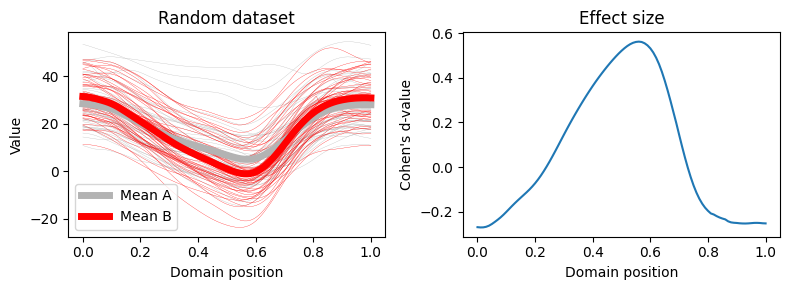

In [24]:

fpathH5 = os.path.join( e1d.dirREPO, 'analysis', 'Bertaux2022', 'data', 'means.h5')
data    = e1d.io.load_h5( fpathH5 )


# separate data into groups (right limb only;  results are similar for left-limb only)
# group 0:  healthy (group=0)
# group 1:  OA, month 0 (group=1, sess=0)
# group 2:  OA, month 6 (group=1, sess=1)
limb   = 1
oasubj = e1d.util.unique_sorted( data['subj'][(data['affected_limb']==limb) & data['sess']==1] )
y1     = np.vstack([data['y'][  (data['subj']==u) & (data['limb']==limb) & (data['sess']==0) ]  for u in oasubj])
y2     = np.vstack([data['y'][  (data['subj']==u) & (data['limb']==limb) & (data['sess']==1) ]  for u in oasubj])
d      = e1d.stats.d_1sample(y1 - y2)


# plot:
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(8,3), tight_layout=True)
Q  = y1.shape[1]
x  = np.linspace(0, 1, Q)
h0 = ax0.plot( x, y1.T, color='0.7', lw=0.2 )[0]
h1 = ax0.plot( x, y2.T, color='r', lw=0.2 )[0]
h2 = ax0.plot( x, y1.mean(axis=0), '0.7', lw=5 )[0]
h3 = ax0.plot( x, y2.mean(axis=0), 'r', lw=5 )[0]
ax0.legend([h2,h3], ['Mean A', 'Mean B'] )
plt.setp(ax0, xlabel='Domain position', ylabel='Value', title='Random dataset')
ax1.plot( x, d )
plt.setp(ax1, xlabel='Domain position', ylabel="Cohen's d-value", title='Effect size')
plt.show()


<br>

Next let's calculate the residuals and estimate the smoothness (FWHM):

<br>

In [25]:
dy    = y1 - y2
res   = dy - dy.mean(axis=0)
efwhm = e1d.smoothness.estimate_fwhm( res ) 

print( f'Estimated FWHM: {efwhm:.3f}' )

Estimated FWHM: 73.336


<br>

Last let's use the actual experimental scenario to estimate interpretations

<br>

CriticalValues
  Very small = 0.057  (p=0.4912)
       Small = 0.133  (p=0.33003)
      Medium = 0.229  (p=0.13913)
       Large = 0.315  (p=0.045241)
  Very large = 0.421  (p=0.0075904)
        Huge = 0.609  (p=0.00014728)



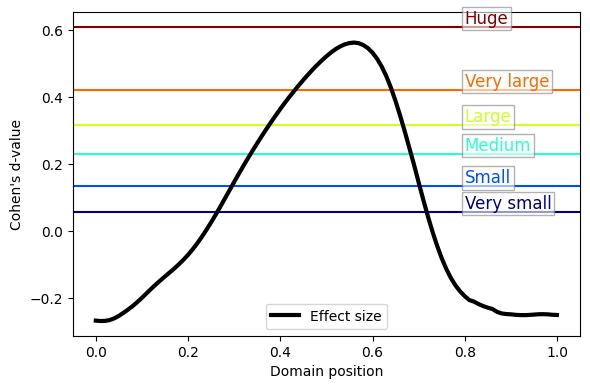

In [42]:


n,Q = dy.shape

cv = e1d.stats.d_critical(n, dim=1, Q=Q, fwhm=efwhm)

print( cv )



def plot_critical_values(ax, cv, ylim=(-1,1), colors=None):
    if colors is None:
        colors = plt.cm.jet( np.linspace(0, 1, len(cv)) )
    ymin,ymax  = ylim
    for c,(key,value) in zip(colors, cv.items()):
        if value < ymax:
            ax.axhline(value, color=c, ls='-', zorder=0)
            bbox = dict(facecolor='w', edgecolor="0.5", pad=2, alpha=0.6)
            ax.text( 0.8, value+0.01, key, color=c, bbox=bbox, size=12 )



fig,ax = plt.subplots(1, 1, figsize=(6,4), tight_layout=True)
x  = np.linspace(0, 1, Q)
h0 = ax.plot( x, d, 'k', lw=3 )[0]
plt.setp(ax, xlabel='Domain position', ylabel="Cohen's d-value")
# colors = plt.cm.hot( np.linspace(0, 1, 8) )[2:]
plot_critical_values(ax, cv)
ax.legend([h0], ['Effect size'] )
plt.show()